In [1]:
%matplotlib notebook
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from scipy.interpolate import interp1d
import numpy as np
from astropy.cosmology import LambdaCDM
from astropy.table import Table
from math import atan2, degrees

In [17]:
#Label line with line2D label data
def labelLine(line,x,label=None,align=True,**kwargs):

    ax = line.axes
    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if (x < xdata[0]) or (x > xdata[-1]):
        print('x label location is outside data range!')
        return

    #Find corresponding y co-ordinate and angle of the line
    ip = 1
    for i in range(len(xdata)):
        if x < xdata[i]:
            ip = i
            break

    y = ydata[ip-1] + (ydata[ip]-ydata[ip-1])*(x-xdata[ip-1])/(xdata[ip]-xdata[ip-1])

    if not label:
        label = line.get_label()

    if align:
        #Compute the slope
        dx = xdata[ip] - xdata[ip-1]
        dy = ydata[ip] - ydata[ip-1]
        ang = degrees(atan2(dy,dx))

        #Transform to screen co-ordinates
        pt = np.array([x,y]).reshape((1,2))
        trans_angle = ax.transData.transform_angles(np.array((ang,)),pt)[0]

    else:
        trans_angle = 0

    #Set a bunch of keyword arguments
    if 'color' not in kwargs:
        kwargs['color'] = line.get_color()

    if ('horizontalalignment' not in kwargs) and ('ha' not in kwargs):
        kwargs['ha'] = 'center'

    if ('verticalalignment' not in kwargs) and ('va' not in kwargs):
        kwargs['va'] = 'center'

    if 'backgroundcolor' not in kwargs:
        kwargs['backgroundcolor'] = ax.get_facecolor()

    if 'clip_on' not in kwargs:
        kwargs['clip_on'] = True

    if 'zorder' not in kwargs:
        kwargs['zorder'] = 2.5

    ax.text(x,y,label,rotation=trans_angle,**kwargs)

def labelLines(lines,align=True,xvals=None,**kwargs):

    ax = lines[0].axes
    labLines = []
    labels = []

    #Take only the lines which have labels other than the default ones
    for line in lines:
        label = line.get_label()
        if "_line" not in label:
            labLines.append(line)
            labels.append(label)

    if xvals is None:
        xmin,xmax = ax.get_xlim()
        xvals = np.linspace(xmin,xmax,len(labLines)+2)[1:-1]

    for line,x,label in zip(labLines,xvals,labels):
        labelLine(line,x,label,align,**kwargs)

In [2]:
# read in the catalog
xray_data = Table.read('results_table_inspected_0.5_2.0.fits')
print(xray_data.columns)
print(xray_data['REDSHIFT'])
print(xray_data['LUM'])

<TableColumns names=('NAME','RA_detc','DEC_detc','REDSHIFT','INDEX','PSZ_dist','EXPTIME','SN','redCHI2','DOF','NORM','NORM_NEG','NORM_POS','FLUX','CNT_RATE_NET','CNT_RATE_MODEL','ECF','LUM','FLUX_CORR','FLUX_CORR_POSERR','FLUX_CORR_NEGERR','LUM_CORR','LUM_CORR_POSERR','LUM_CORR_NEGERR','CORR')>
      REDSHIFT     
-------------------
 0.2840000092983246
 0.1940000057220459
              0.136
               -1.0
               -1.0
 0.0989999994635582
               -1.0
0.10499999672174454
 0.2992999851703644
  0.065700002014637
                ...
 0.2199999988079071
               -1.0
               -1.0
               -1.0
 0.2193918228149414
0.06199999898672104
               -1.0
               -1.0
0.20000000298023224
 0.1785999983549118
0.14959999918937683
Length = 442 rows
   LUM    
----------
1.3415e+44
1.3366e+44
8.6147e+43
5.0106e+42
3.1658e+42
1.4703e+43
9.4688e+42
2.5969e+43
2.4701e+44
1.9692e+43
       ...
1.5692e+44
3.1956e+43
2.5018e+43
2.5126e+43
7.5967e+43
2.3268e+

In [5]:
# read psz data
psz_data = Table.read('./external_data/psz_xxvii_fig26.csv')
print(psz_data.columns)
print(psz_data['z'])
print(psz_data['m500'])

<TableColumns names=('z','m500')>
         z          
--------------------
0.010676810638673817
 0.01341512287823357
 0.01612607138701802
0.019558388168526147
0.023288043126963504
0.027342830917999328
  0.0327272374697814
 0.03888084495753236
0.045803653381252196
0.054264863676909775
                 ...
  0.8257734024536862
  0.8426958230450015
  0.8596182436363167
  0.8765406642276319
  0.8934630848189469
  0.9103855054102621
  0.9273079260015773
  0.9442303465928923
  0.9611527671842075
  0.9780751877755227
  0.9934592064948999
Length = 67 rows
       m500       
------------------
0.5226868772272767
0.5676882492711621
0.6313850859156134
0.7140290460327493
0.7929279270127617
 0.857302374139694
0.9482826417066961
1.0443283394317953
 1.155156530995657
1.2890021334945372
               ...
 5.085877215783723
 5.108229291602182
 5.128634595143788
  5.15322858242372
  5.15322858242372
  5.15322858242372
  5.15322858242372
  5.15322858242372
 5.151174586663845
  5.13067960323566
 5.12818

In [6]:
x = psz_data['z']
y = psz_data['m500']
zarr = x

<IPython.core.display.Javascript object>


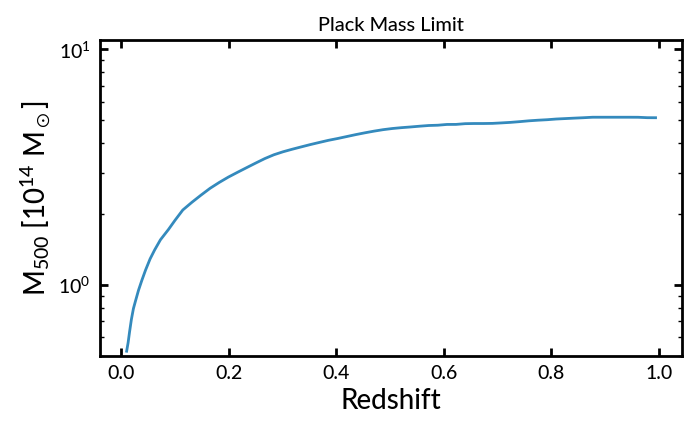

In [7]:
# Plot the Planck Mass Limit -- 20% survey completeness
fig, ax = plt.subplots(figsize=(7, 7 * (np.sqrt(5.) - 1.0) / 2.0))
ax.set_xlabel('Redshift')
ax.set_ylabel('M$_{500}$ [$10^{14}~M_\odot$]')
ax.set_title('Plack Mass Limit')

ax.plot(x,y)
ax.semilogy()
ax.set_ylim(0.5,11)
plt.tight_layout()

<IPython.core.display.Javascript object>


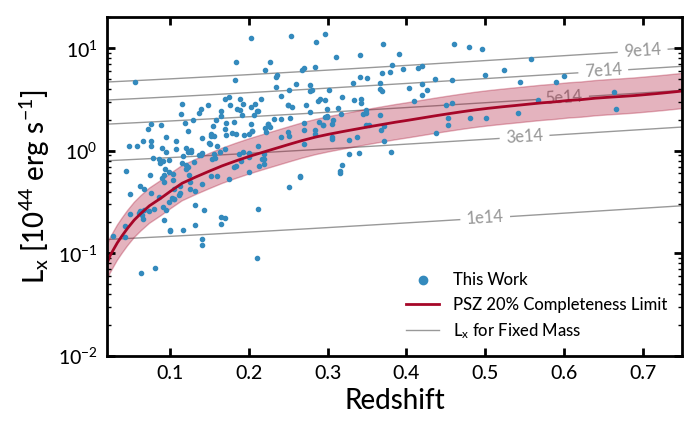

Text(0, 0.5, 'L$_x$ [$10^{44}~erg~s^{-1}$]')

In [15]:
# convert PSZ masses to Lx

# Define the cosmology
cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7, Tcmb0=2.725)
h = cosmo.H0.value/100

lnLx = 47.392 + 1.61 * np.log(y*1e14) + 1.850*np.log(cosmo.efunc(zarr)) - 0.39*np.log(h/0.72)
Lx = np.exp(lnLx)

fig, ax = plt.subplots(figsize=(7, 7 * (np.sqrt(5.) - 1.0) / 2.0))
ax.semilogy()
ax.set_xlim(0.02,0.75)
ax.set_ylim(0.01, 20)

# planck limits
ax.plot(zarr, Lx/1e44, color='#A60628', label='PSZ 20% Completeness Limit')

# add planck errors
ax.fill_between(zarr, 0.673 * Lx / 1e44, 1.486 * Lx / 1e44, color='#A60628', alpha=0.3)

# our cluster points
line = ax.scatter(xray_data['REDSHIFT'], xray_data['LUM_CORR']/1e44, c='#348ABD', marker='.', label='This Work')

# for fixed mass
for i in range(1,10,2):
    lnLx = 47.392 + 1.61 * np.log(i * 1e14) + 1.850*np.log(cosmo.efunc(zarr)) - 0.39*np.log(h/0.72)
    Lx = np.exp(lnLx)
    ax.plot(zarr, Lx/1e44, lw=1, c='0.6', zorder=-i)

ax.set_xlabel('Redshift')
ax.set_ylabel('L$_x$ [$10^{44}~erg~s^{-1}$]')



In [16]:
plt.tight_layout()

In [18]:
lines = ax.get_lines()

In [19]:
for i, j in enumerate(range(1,10,2)):
    labelLine(lines[1+i], 0.5 + 0.05 * i, f'{j}e14', zorder=-i)

In [20]:
# Custom Legend
legend_elements = [Line2D([0], [0], linewidth=0, marker='o', color='#348ABD', label='This Work'),
                   Line2D([0], [0], linewidth=2, color='#A60628', label='PSZ 20% Completeness Limit'), 
                   Line2D([0], [0], lw=1, color='0.6', label='$L_x$ for Fixed Mass') 
                  ]
ax.legend(handles=legend_elements, loc='lower right')

In [ ]:
plt.savefig('Lx_z_inspected.pdf', bbox='tight')